<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Transformada_Inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**El método de la transformada inversa**

Este método puede utilizarse para simular variables aleatorias continuas, lo cual se logra mediante la función acumulada $F(x)$ y la generación de números pseudoaleatorios $r_i\sim U(0,1)$

*Procedimiento:*


1.   Definir la función de densidad $F(x)$ que represente la variable a modelar
2. Calcular la función acumulada $F(x)$.
3. Despejar la variable aleatoria $x$ y obtener la función acumulada inversa $F(x)^-1$
4. Generar las variables aleatorias $x$, sustituyendo valores con números pseudoaleatorios $r_i \sim U(0,1)$ en la función acumulada inversa.



In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Parámetro
lam = 1.0

#x:Variable aleatoria

# Definimos la fdp
def expo_pdf(x, lam):
    return lam * np.exp(-lam * x)
                 #calcula e^-λx


In [46]:
# Definimos la cdf
def expo_cdf(x, lam):
    return 1 - np.exp(-lam * x)

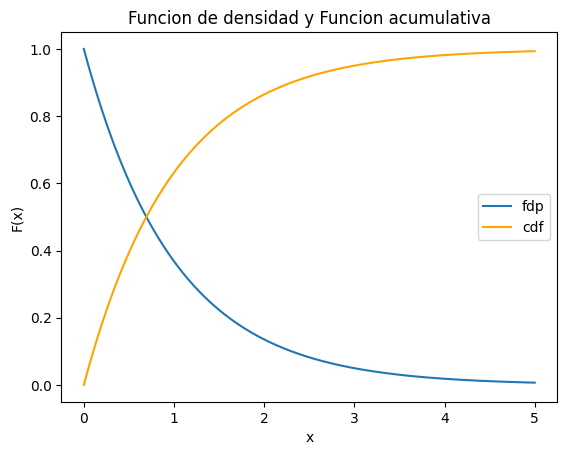

In [47]:
# Crear un rango de valores para x
x = np.linspace(0, 5, 1000)

# Calcular la fdp y la cdf
Valores_pdf= expo_pdf(x, lam)
Valores_cdf= expo_cdf(x, lam)

plt.plot(x, Valores_pdf, label='fdp')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Graficar la cdf
plt.plot(x, Valores_cdf, label='cdf', color='orange')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()

plt.title('Funcion de densidad y Funcion acumulativa')
plt.show()


Para una distribución exponmcencial la función de distribución acumulativa (CDF), esta dada por:
$F(X)=1-e^-λx$

Para encontrar la inversa de esta función, resolvemos para $x$ en términos de $u$ (donde $u$ es un valor en el rango $(0,1)$ de uns distribución uniforme . Esto nos da la inversa de la cdf. Una manera de implementarlo es con la siguiente función

In [48]:
# Inversa de la cdf
def expo_inv_cdf(u, lam):
    return -np.log(1 - u) / lam

In [49]:
# Generar una muestra usando el método de la transformada inversa

#Parámetros
'''
n:Tamaño de la muestra
lam: parámetro de la dist.exp

'''
def muestra_inv(expo_inv_cdf, lam, n):
    u = np.random.uniform(0, 1, n)
    return expo_inv_cdf(u, lam)

In [51]:
#generamos una muestra aleatoria
muestra = muestra_inv(expo_inv_cdf, lam, 1000)

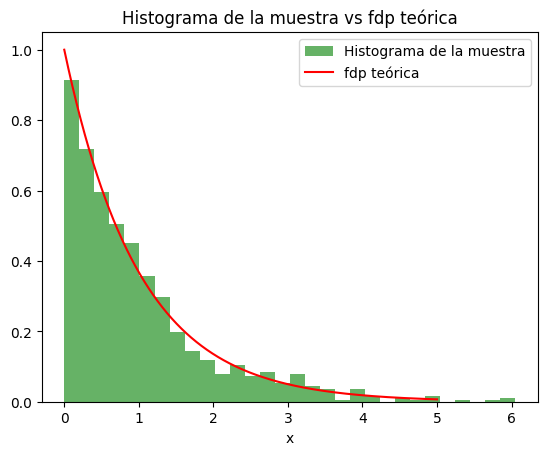

In [54]:
# Graficar el histograma de la muestra
plt.hist(muestra, bins=30, density=True, alpha=0.6, color='g', label='Histograma de la muestra')

# Graficar la fdp teórica
plt.plot(x, Valores_pdf, label='fdp teórica', color='red')

plt.title('Histograma de la muestra vs fdp teórica')
plt.xlabel('x')
plt.legend()

plt.show()

